<a href="https://colab.research.google.com/github/ricardoosorioc/Proyecto_American_Express-Default_Prediction/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORACIÓN DE LOS DATOS

### La competencia de kaggle desde el siguiente enlace
https://www.kaggle.com/competitions/amex-default-prediction/data

### Para este notebook estamos trayendo los datos desde:
https://www.kaggle.com/datasets/ruchi798/parquet-files-amexdefault-prediction/?select=test_data.ftr

Primero importamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings

## Trayendo los datos

Para traer los datos hay dos metodos: Descargandolos desde la competencia e importarlos localmente, o trayendolos directamente desde kaggle con ayuda de su IDE.

Escoja solo una.

### Localmente

In [ ]:
import pandas as pd

df = pd.read_feather("train_data.ftr")

### Los datos desde kaggle


In [ ]:
# Instala la biblioteca de Kaggle
!pip install kaggle

# Importa las bibliotecas necesarias
import os
import json

# Define las credenciales de Kaggle
kaggle_credentials = {
    "username": "ricardoosorioc",
    "key": "1f1a995f7c48191dc94721671d272f0c"
}

# Crea la carpeta .kaggle si no existe
kaggle_folder = '/content/.kaggle'
if not os.path.exists(kaggle_folder):
    os.makedirs(kaggle_folder)

# Guarda las credenciales en un archivo JSON
with open('/content/.kaggle/kaggle.json', 'w') as json_file:
    json.dump(kaggle_credentials, json_file)

# Configura las variables de entorno para usar Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

# Descarga un conjunto de datos desde Kaggle
!kaggle datasets download -d parquet-files-amexdefault-prediction
# Utiliza el comando wget para descargar el archivo train_labels.csv
!wget --no-check-certificate https://www.kaggle.com/competitions/amex-default-prediction/data?select=train_labels.csv


# Descomprime el archivo descargado (si es necesario)
import zipfile
with zipfile.ZipFile('parquet-files-amexdefault-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('parquet-files-amexdefault-prediction')

df = pd.read_feather("train_data.ftr")

### Visualizando los datos

In [ ]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827


Resumen estadístico de las características numéricas

In [ ]:

# Suprimir advertencias
warnings.filterwarnings('ignore')


In [ ]:




# Ejecutar df.describe() para ver la tabla de resumen de datos sin las advertencias
df.describe()



,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,194699.000000,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
min,-4.589844e-01,0.000000e+00,-7.589844e+00,0.000000e+00,0.000000e+00,-6.269531e-01,0.000000e+00,0.000000e+00,-0.000454,1.192093e-07,...,5.960464e-08,0.000000,5.960464e-08,0.000000e+00,0.000000e+00,0.000000e+00,-0.014542,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.802246e-01,4.528046e-03,8.865356e-03,1.053467e-01,2.895355e-03,1.273193e-01,2.872467e-03,5.226135e-03,0.037506,4.226685e-02,...,9.315491e-03,0.002533,3.517151e-03,3.026962e-03,2.555847e-03,3.026962e-03,0.199341,3.028870e-03,2.752304e-03,3.028870e-03
50%,6.943359e-01,9.056091e-03,3.134155e-02,8.144531e-01,5.783081e-03,1.639404e-01,5.744934e-03,9.780884e-03,0.120544,8.850098e-02,...,2.539062e-01,0.005070,7.038116e-03,6.053925e-03,5.111694e-03,6.050110e-03,0.382080,6.053925e-03,5.508423e-03,6.053925e-03
75%,8.647461e-01,2.366943e-01,1.258545e-01,1.001953e+00,8.659363e-03,2.580566e-01,8.613586e-03,1.550293e-01,0.250977,1.843262e-01,...,2.583008e-01,0.007572,5.014648e-01,9.078979e-03,7.663727e-03,9.078979e-03,0.559082,9.078979e-03,8.262634e-03,9.078979e-03
max,1.009766e+00,5.390625e+00,1.324219e+00,1.009766e+00,3.255859e+00,5.484375e+00,8.992188e+00,1.625000e+00,4.191406,1.010938e+01,...,1.759766e+00,1.009766,3.005859e+00,1.009766e+00,1.009766e+00,1.339844e+00,2.228516,1.009766e+00,1.343750e+00,4.828125e+00


Viendo el numero de nan en el dataset

In [ ]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)

In [ ]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

P_2        45985
B_2         2016
S_3      1020544
D_41        2016
B_3         2016
          ...   
D_141     101548
D_142    4587043
D_143     101548
D_144      40727
D_145     101548
Length: 122, dtype: int64

In [ ]:
datos_faltantes = df.isna().sum()

# Calcula el número total de datos en cada columna
datos_totales = df.count()

# Combina los resultados en un DataFrame para facilitar la visualización
resumen = pd.DataFrame({
    'Datos Faltantes': datos_faltantes,
    'Datos Totales': datos_totales
})

# Muestra el resumen
print(resumen)

             Datos Faltantes  Datos Totales
customer_ID                0        5531451
S_2                        0        5531451
P_2                    45985        5485466
D_39                       0        5531451
B_1                        0        5531451
...                      ...            ...
D_141                 101548        5429903
D_142                4587043         944408
D_143                 101548        5429903
D_144                  40727        5490724
D_145                 101548        5429903

[190 rows x 2 columns]


Vemos las columnas que tienen mas del 90% de sus datos con nan

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con 190 columnas

# Calcula la proporción de valores NaN en cada columna
proporcion_nan = df.isna().mean()

# Establece un umbral del 90% para identificar columnas con más del 90% de NaN
umbral = 0.9

# Filtra las columnas que cumplen con el umbral
columnas_con_mas_nan = proporcion_nan[proporcion_nan > umbral]

# Muestra las columnas con más del 90% de NaN
print("Columnas con más del 90% de NaN:")
print(columnas_con_mas_nan)
len(columnas_con_mas_nan)

Columnas con más del 90% de NaN:
D_49     0.901376
D_73     0.989902
R_9      0.943499
B_29     0.931046
D_87     0.999301
D_88     0.998915
D_106    0.902133
D_108    0.994768
D_110    0.994335
D_111    0.994335
B_39     0.993920
B_42     0.987078
D_132    0.901911
D_134    0.964801
D_135    0.964801
D_136    0.964801
D_137    0.964801
D_138    0.964801
dtype: float64


18

Podemos ver la distribucion de cualquier columna numerica

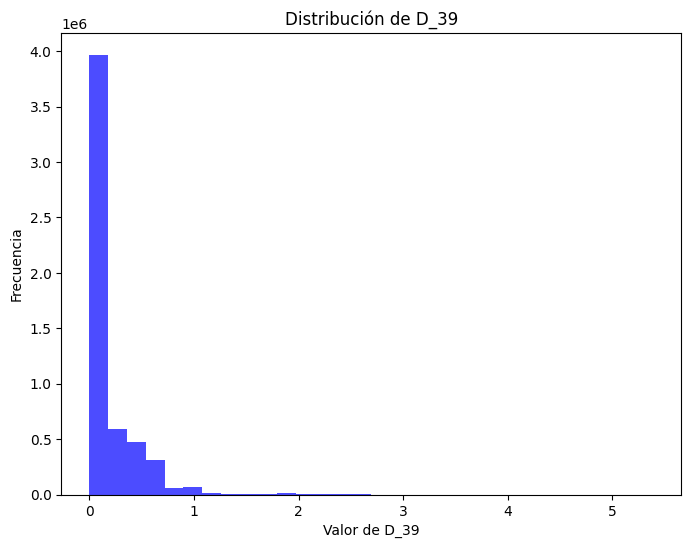

In [ ]:
# Ejemplo para una variable numérica
plt.figure(figsize=(8, 6))
plt.hist(df['D_39'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de D_39')
plt.xlabel('Valor de D_39')
plt.ylabel('Frecuencia')
plt.show()

### Unión con train_labels para obtener la columna target

In [ ]:
# Supongamos que 'nombre_de_la_columna_objetivo' es el nombre de la columna objetivo que estás buscando.
nombre_de_la_columna_objetivo = 'target'

# Verifica si la columna objetivo está en el DataFrame
if nombre_de_la_columna_objetivo in df.columns:
    print(f"El DataFrame contiene la columna objetivo '{nombre_de_la_columna_objetivo}'.")
else:
    print(f"El DataFrame no contiene la columna objetivo '{nombre_de_la_columna_objetivo}'.")


El DataFrame no contiene la columna objetivo 'target'.


In [ ]:
train_labels = pd.read_csv('train_labels.csv')

# Realiza una fusión (merge) en función de la columna común, que es 'customer_ID' en este caso
# 'customer_ID' es el identificador único que relaciona los datos y las etiquetas
cdf = pd.merge(df, train_labels, on='customer_ID')


In [ ]:
cdf.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


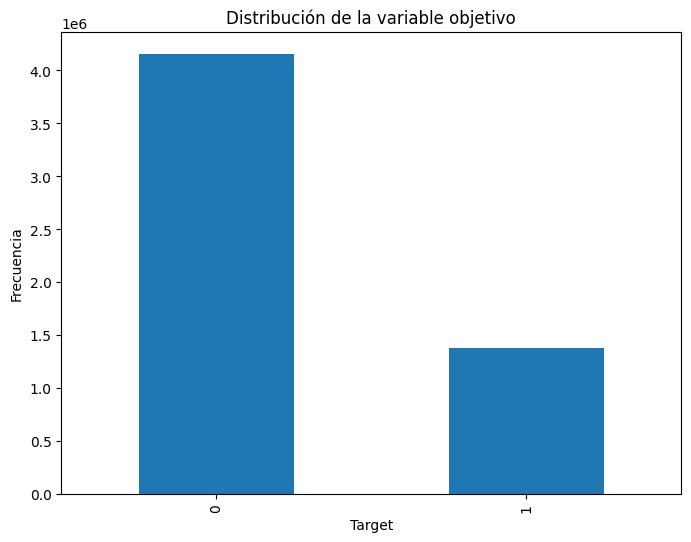

In [ ]:
plt.figure(figsize=(8, 6))
cdf['target'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()

En la distribución de las clases de la variable objetivo en el gráfico de barras, puedes deducir lo siguiente:

### Desbalance de Clases:
La distribución de las clases de la variable objetivo muestra un desequilibrio significativo entre las clases.
Hay muchas más instancias de la clase target = 0 (4,100,000) en comparación con la clase target = 1 (1,400,000).
Este desequilibrio sugiere que la mayoría de los clientes en tus datos tienen un target = 0, lo que indica que no han tenido problemas de impago,
mientras que una proporción significativamente menor de clientes tienen un target = 1, lo que sugiere problemas de impago.

### Desafíos del Desbalance de Clases:
El desequilibrio de clases puede presentar desafíos en la construcción de modelos de aprendizaje automático, ya que los modelos tienden a estar sesgados hacia la clase mayoritaria. Es importante considerar estrategias para abordar este desbalance, como la ponderación de clases, el muestreo estratificado o técnicas de sobremuestreo/submuestreo, para garantizar que el modelo tenga un rendimiento equilibrado en ambas clases.

### Evaluación del Modelo:
Cuando evaluemos los modelos de clasificación en este contexto, podemos tener en cuenta que las métricas de evaluación (como precisión, recall,1-score, AUC-ROC) deben interpretarse considerando el desbalance de clases. Puede ser útil centrarse en métricas que tengan en cuenta tanto las predicciones correctas como los falsos positivos y falsos negativos.

En resumen, la distribución desequilibrada de clases en tu conjunto de datos indica que el desbalance de clases es un factor importante a considerar
en el desarrollo y la evaluación de modelos de clasificación para predecir el impago de clientes en el futuro.

In [ ]:
cdf._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,5485466.0,NaN,0.00000,-0.458984,0.480225,0.694336,0.864746,1.009766
D_39,5531451.0,NaN,0.00000,0.000000,0.004528,0.009056,0.236694,5.390625
B_1,5531451.0,NaN,0.00000,-7.589844,0.008865,0.031342,0.125854,1.324219
B_2,5529435.0,NaN,0.00000,0.000000,0.105347,0.814453,1.001953,1.009766
R_1,5531451.0,NaN,0.00000,0.000000,0.002895,0.005783,0.008659,3.255859
...,...,...,...,...,...,...,...,...
D_142,944408.0,NaN,0.00000,-0.014542,0.199341,0.382080,0.559082,2.228516
D_143,5429903.0,NaN,0.00000,0.000000,0.003029,0.006054,0.009079,1.009766
D_144,5490724.0,NaN,0.00000,0.000000,0.002752,0.005508,0.008263,1.343750
D_145,5429903.0,NaN,0.00000,0.000000,0.003029,0.006054,0.009079,4.828125


Vemos el tipo de dato de cada columna

In [ ]:
for c in cdf.columns:
    print ("%20s"%c, cdf[c].dtype)

         customer_ID object
                 S_2 object
                 P_2 float16
                D_39 float16
                 B_1 float16
                 B_2 float16
                 R_1 float16
                 S_3 float16
                D_41 float16
                 B_3 float16
                D_42 float16
                D_43 float16
                D_44 float16
                 B_4 float16
                D_45 float16
                 B_5 float16
                 R_2 float16
                D_46 float16
                D_47 float16
                D_48 float16
                D_49 float16
                 B_6 float16
                 B_7 float16
                 B_8 float16
                D_50 float16
                D_51 float16
                 B_9 float16
                 R_3 float16
                D_52 float16
                 P_3 float16
                B_10 float16
                D_53 float16
                 S_5 float16
                B_11 float16
                

Columnas con más del 90% de NaN:
D_49     0.901376
D_73     0.989902
R_9      0.943499
B_29     0.931046
D_87     0.999301
D_88     0.998915
D_106    0.902133
D_108    0.994768
D_110    0.994335
D_111    0.994335
B_39     0.993920
B_42     0.987078
D_132    0.901911
D_134    0.964801
D_135    0.964801
D_136    0.964801
D_137    0.964801
D_138    0.964801
dtype: float64


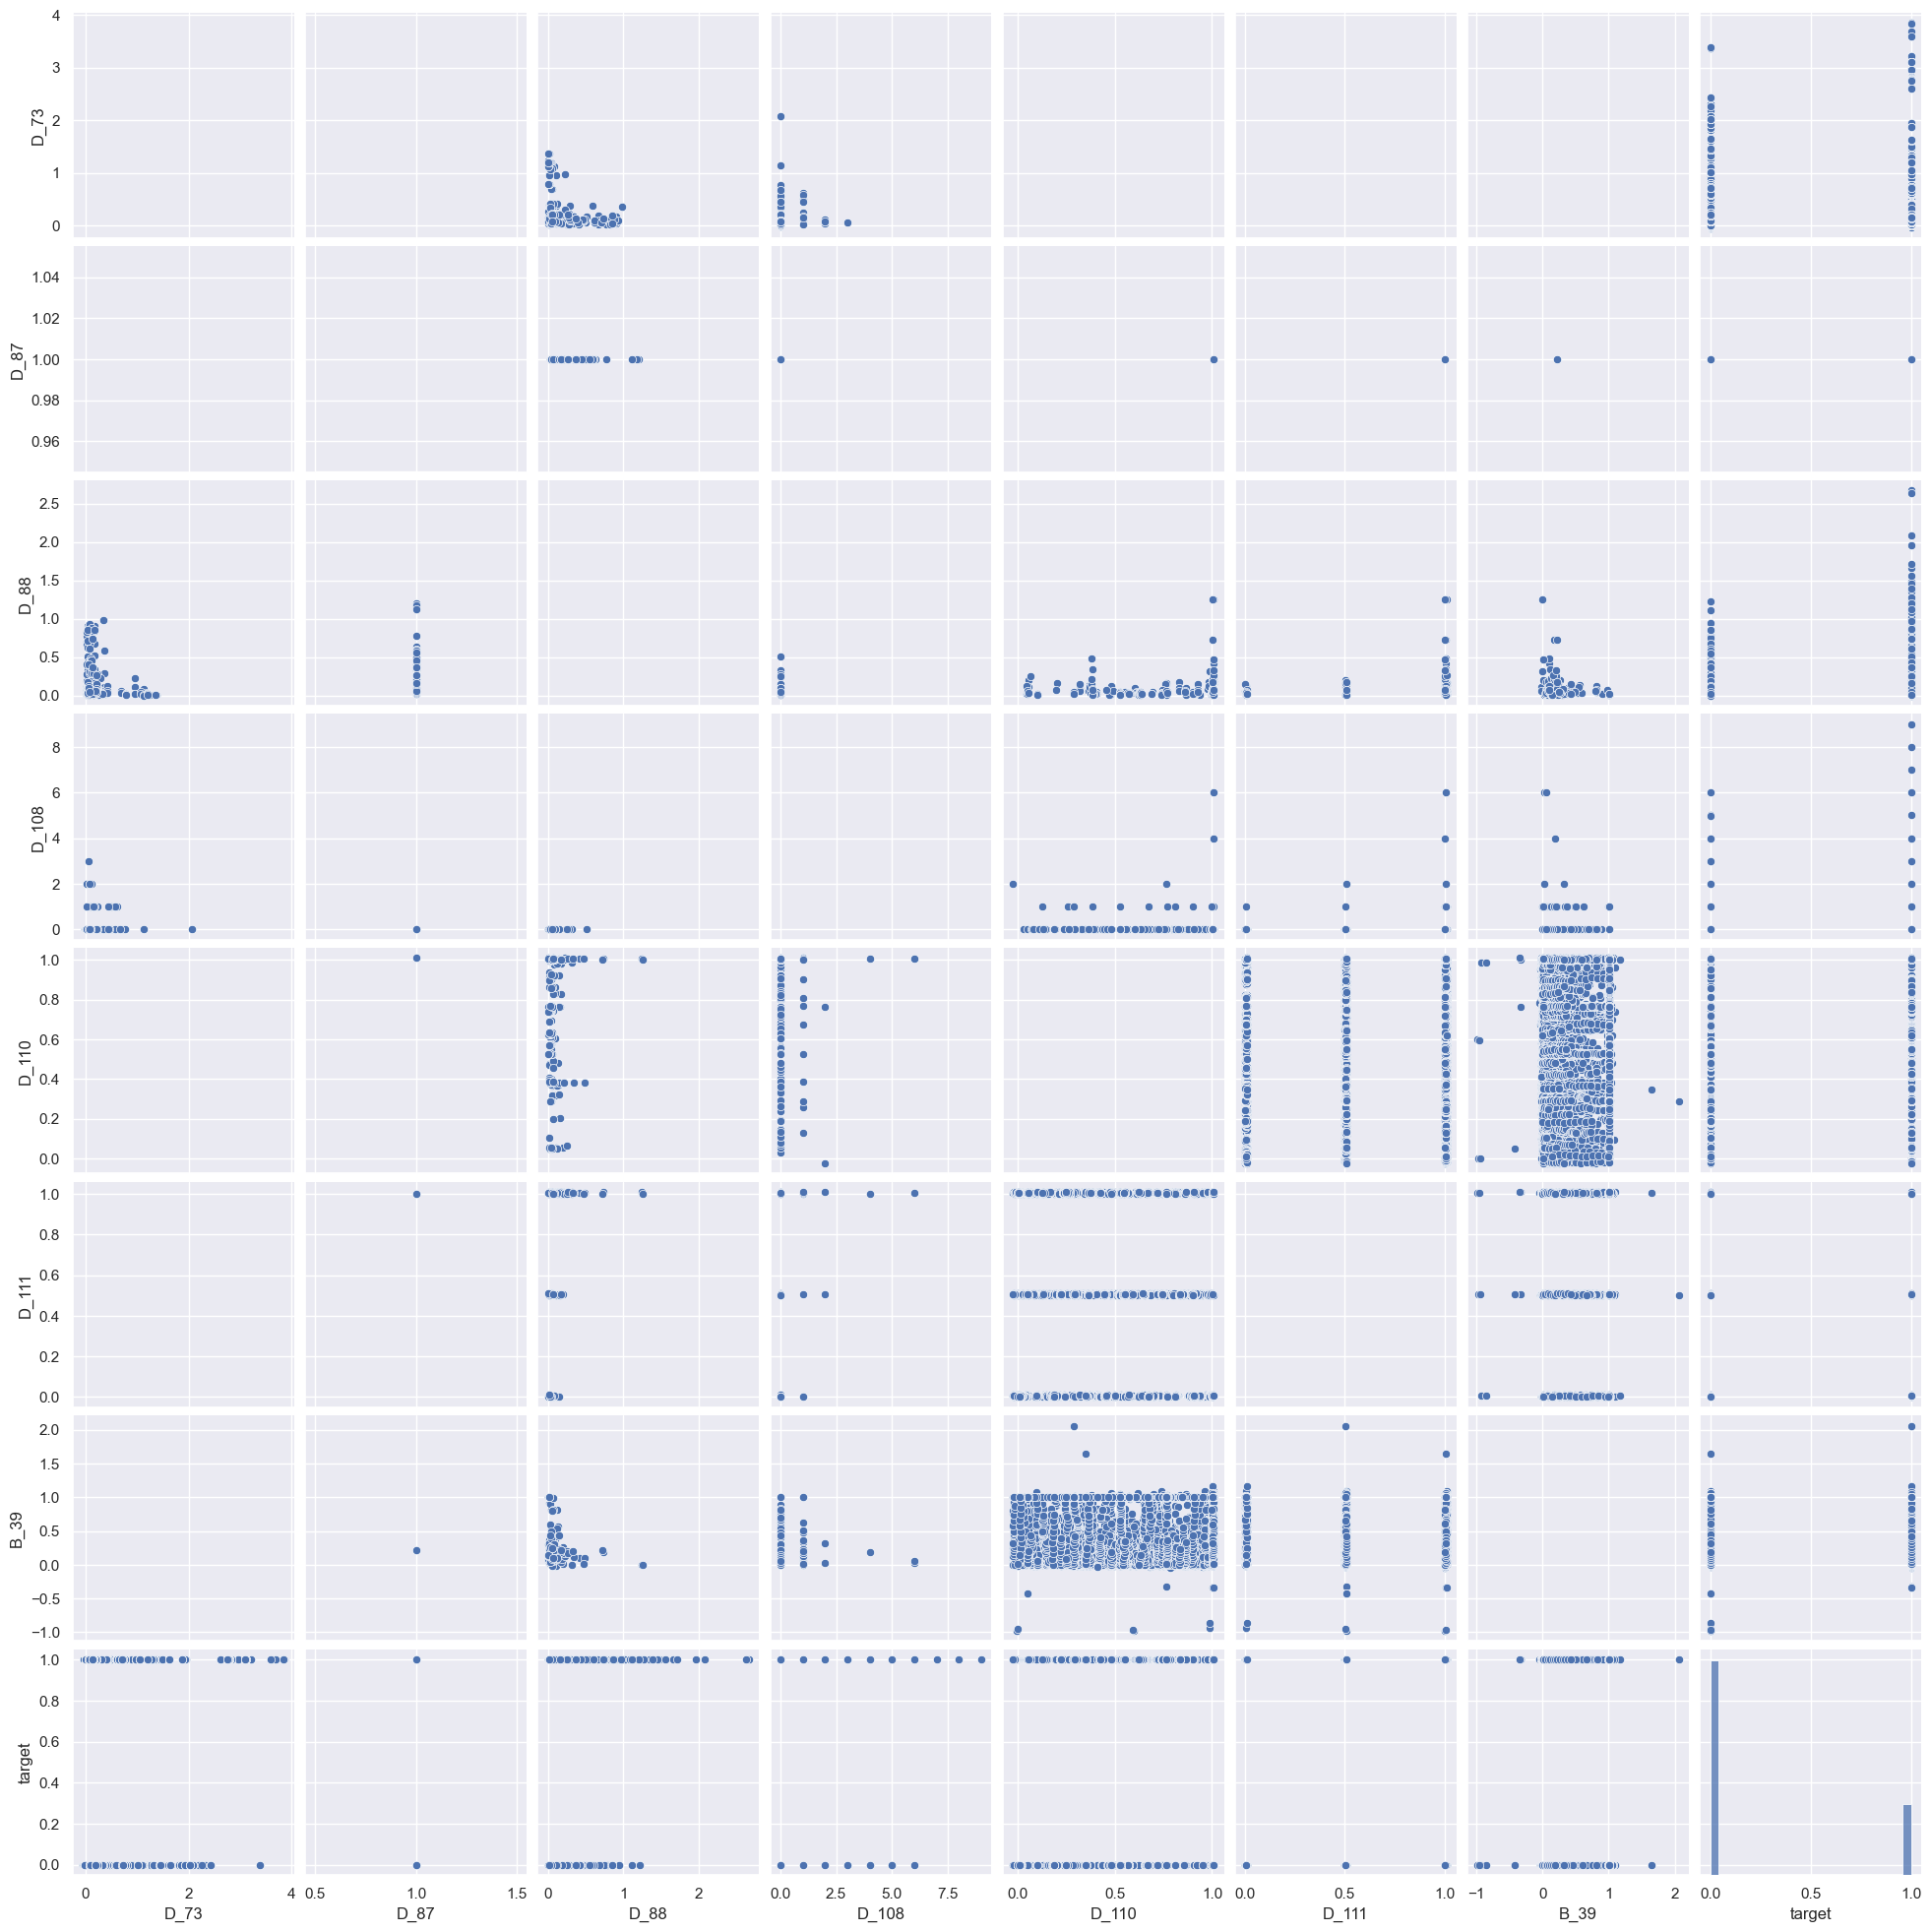

In [ ]:
## Ahora hacemos un grafico para ver la relación entre las graficas con mas Nan y la variable target
cols = ['D_73','D_87','D_88','D_108','D_110','D_111','B_39','target']

sns.set()
sns.pairplot(cdf[cols])

Este código crea un gráfico que muestra una representación visual de los valores faltantes el DataFrame cdf, con cierto control sobre el aspecto del gráfico y etiquetas en el eje y que corresponden a las columnas del DataFrame.

*Por el momento no funciona bien.*

In [ ]:

ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(cdf.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(cdf.shape[1]), cdf.columns);

Vemos las columnas categoricas y sus valores

In [ ]:
ccols = [i for i in cdf.columns if not i in cdf._get_numeric_data()]
print (ccols)

['customer_ID', 'S_2', 'D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']


In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(cdf[c].dropna()))

customer_ID ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'
 '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5'
 '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1' ...
 'ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6'
 'ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461'
 'fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681']
       S_2 ['2017-03-01' '2017-03-02' '2017-03-03' '2017-03-04' '2017-03-05'
 '2017-03-06' '2017-03-07' '2017-03-08' '2017-03-09' '2017-03-10'
 '2017-03-11' '2017-03-12' '2017-03-13' '2017-03-14' '2017-03-15'
 '2017-03-16' '2017-03-17' '2017-03-18' '2017-03-19' '2017-03-20'
 '2017-03-21' '2017-03-22' '2017-03-23' '2017-03-24' '2017-03-25'
 '2017-03-26' '2017-03-27' '2017-03-28' '2017-03-29' '2017-03-30'
 '2017-03-31' '2017-04-01' '2017-04-02' '2017-04-03' '2017-04-04'
 '2017-04-05' '2017-04-06' '2017-04-07' '2017-04-08' '2017-04-09'
 '2017-04-10' '2017-04-11' '2017-04-

## Codificación de variables categóricas

Antes de comenzar el entrenamiento, debemos codificar estas variables para que los modelos puedan entenderlas.
Primero vemos una relacion entre la variable catergótica y target, y posteriormente realizamos su codificación.

### D_63

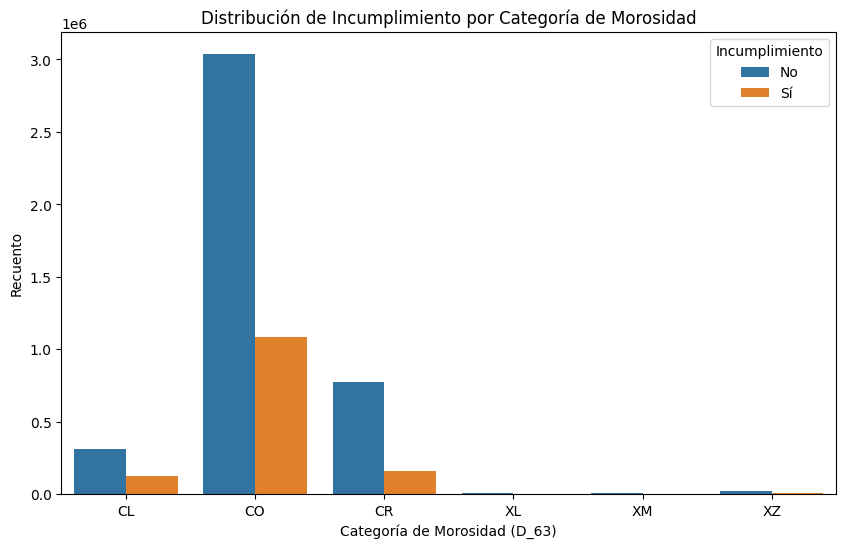

In [ ]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=cdf, x='D_63', hue='target')
plt.title('Distribución de Incumplimiento por Categoría de Morosidad')
plt.xlabel('Categoría de Morosidad (D_63)')
plt.ylabel('Recuento')
plt.legend(title='Incumplimiento', labels=['No', 'Sí'])
plt.show()

Hacemos una codificación one-hot para esta columna

In [ ]:
# Codificar las categorías principales ('CL', 'CO', 'CR') de forma individual
cdf['D_63_encoded'] = cdf['D_63'].apply(lambda x: x if x in ['CL', 'CO', 'CR'] else 'Other')

# Aplicar la codificación one-hot a la columna 'D_63_encoded'
cdf = pd.get_dummies(cdf, columns=['D_63_encoded'], prefix='D_63')

In [ ]:
cdf['D_63_CL']

0          False
1          False
2          False
3          False
4          False
           ...  
5531446     True
5531447     True
5531448     True
5531449     True
5531450     True
Name: D_63_CL, Length: 5531451, dtype: bool

### D_64

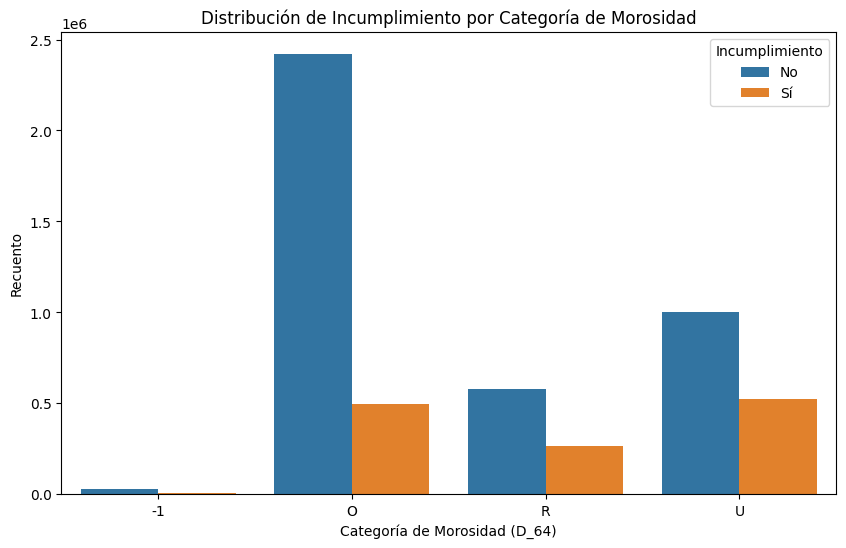

In [ ]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=cdf, x='D_64', hue='target')
plt.title('Distribución de Incumplimiento por Categoría de Morosidad')
plt.xlabel('Categoría de Morosidad (D_64)')
plt.ylabel('Recuento')
plt.legend(title='Incumplimiento', labels=['No', 'Sí'])
plt.show()

Para esta columna he decidido esperar antes de hacer la codificación para entender cual seria la mejor manera de hacerla